In [30]:
import tensorflow as tf
import numpy as np


In [31]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [32]:
#Check the features
print(X)

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


In [33]:
# Check the first ten labels
print(y[:10])

[1 1 1 1 0 1 1 1 1 0]


In [34]:
# Make dataframe of feature and labels
import pandas as pd

data_circle = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "Label": y
})   
data_circle

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [35]:
# Check out the different labels
data_circle['Label'].value_counts()

1    500
0    500
Name: Label, dtype: int64

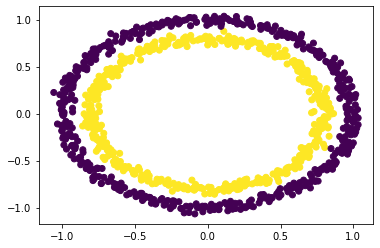

In [36]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [37]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [38]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [39]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 953us/step - loss: 5.1023 - accuracy: 0.4700
Epoch 2/5
32/32 [==============================] - 0s 928us/step - loss: 4.2787 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 968us/step - loss: 2.9082 - accuracy: 0.5100
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7500 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7106 - accuracy: 0.4930


In [41]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [42]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [43]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 990us/step - loss: 0.6932 - accuracy: 0.5000


[0.6932390928268433, 0.5]

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data
  

In [45]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundary of the plot and create meshgrid
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()-0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()-0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
        
    )   
    
    # Create X values (we are going to predict on all these)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    # Make a predictions using the trained model 
    y_pred = model.predict(x_in)
    
    # Check for multi-class 
    if model.output_shape[-1] > 1 :
        print('Doing multiclass classification...')
        #We have to reshape our predictions to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification...')
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    
    #Plot decision boundary
    plt.contourf(xx, yy, y_pred, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

313/313 [==============================] - 0s 865us/step
Doing binary classification...


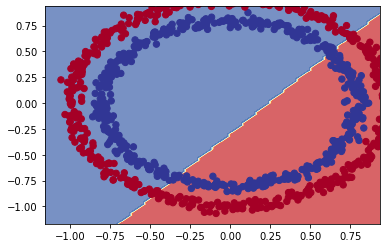

In [46]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [47]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_8' (type Sequential).
    
    Input 0 of layer "dense_16" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_8' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [ ]:
model_3.summary()

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [55]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.5031 - mae: 0.5031
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5029 - mae: 0.5029
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5028 - mae: 0.5028
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5026 - mae: 0.5026
Epoch 5/100
32/32 [==============================] - 0s 856us/step - loss: 0.5025 - mae: 0.5025
Epoch 6/100
32/32 [==============================] - 0s 859us/step - loss: 0.5024 - mae: 0.5024
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5022 - mae: 0.5022
Epoch 8/100
32/32 [==============================] - 0s 807us/step - loss: 0.5021 - mae: 0.5021
Epoch 9/100
32/32 [==============================] - 0s 867us/step - loss: 0.5020 - mae: 0.5020
Epoch 10/100
32/32 [==============================] - 0s 999us/step - loss: 0.5018 - mae: 0.5018
Epoch 11/100
32/32 [=============================

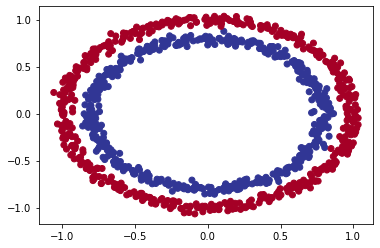

In [56]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 676us/step
Doing binary classification...


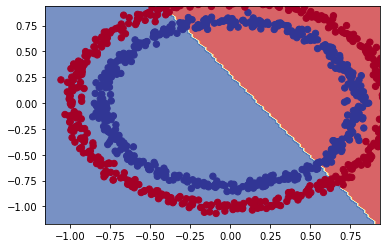

In [57]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.1406 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.6719 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5236 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4228 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3440 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2798 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2269 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1813 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1428 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1084 - accuracy: 0.5000
Epoch 11/

In [63]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1, activation='sigmoid') # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 997us/step - loss: 0.6993 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 999us/step - loss: 0.6936 - accuracy: 0.5180
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5420
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5890
Epoch 7/100
32/32 [==============================] - 0s 963us/step - loss: 0.6648 - accuracy: 0.5910
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6950
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7070
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5693 - accuracy: 0.7450
Epo

313/313 [==============================] - 0s 648us/step
Doing binary classification...


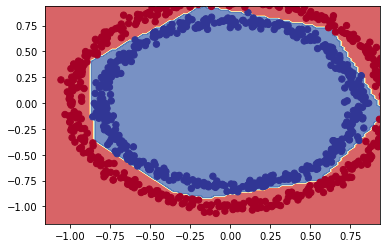

In [64]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [65]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

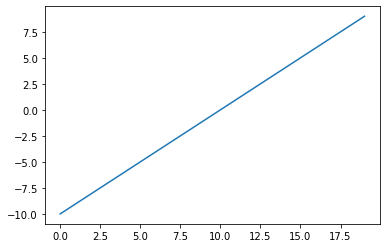

In [66]:
# Visualize our toy tensor
plt.plot(A);

In [67]:

# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

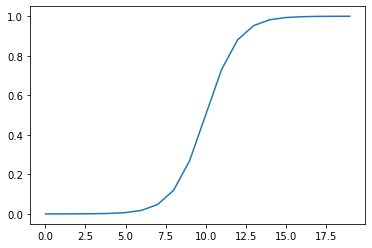

In [68]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [69]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)
     

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

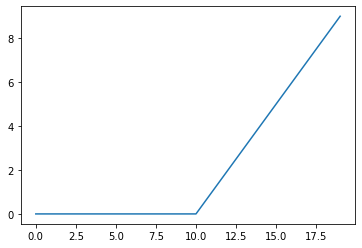

In [70]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [71]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [72]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving classification model

In [73]:
# How many examples are in the whole dataset?
len(X)

1000

In [74]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [75]:
# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 1ms/step - loss: 0.7141 - accuracy: 0.4787
Epoch 2/25
25/25 [==============================] - 0s 960us/step - loss: 0.7090 - accuracy: 0.4863
Epoch 3/25
25/25 [==============================] - 0s 884us/step - loss: 0.7056 - accuracy: 0.4725
Epoch 4/25
25/25 [==============================] - 0s 848us/step - loss: 0.7034 - accuracy: 0.4975
Epoch 5/25
25/25 [==============================] - 0s 917us/step - loss: 0.7016 - accuracy: 0.4975
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.4913
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6990 - accuracy: 0.4938
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.4913
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.4938
Epoch 10/25
25/25 [==============================] - 0s 991us/step - loss: 0.6969 - accuracy: 0.4888
Epoch 11/

In [76]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.4950
Model loss on the test set: 0.6902405619621277
Model accuracy on the test set: 49.50%


313/313 [==============================] - 0s 868us/step
Doing binary classification...
313/313 [==============================] - 0s 853us/step
Doing binary classification...


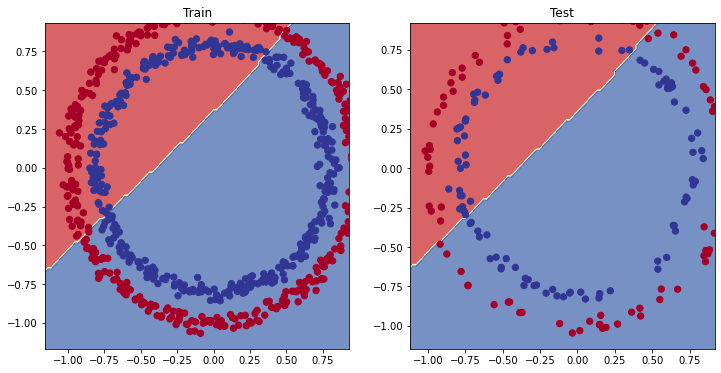

In [77]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [78]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.714113,0.47875
1,0.708994,0.48625
2,0.705592,0.47250
3,0.703361,0.49750
4,0.701637,0.49750
5,0.700435,0.49125
6,0.699007,0.49375
7,0.698287,0.49125
8,0.697585,0.49375
9,0.696893,0.48875


Text(0.5, 1.0, 'Model_8 training curves')

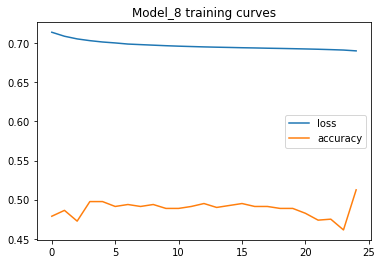

In [79]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

### Finding the best lr

In [80]:
# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler( lambda x : 1e-4 * 10**(x/20))
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.8212 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8172 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.8130 - accuracy: 0.5025 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 907us/step - loss: 0.8085 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 944us/step - loss: 0.8037 - accuracy: 0.4925 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7988 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7933 - accuracy: 0.4850 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 959us/step - loss: 0.7878 - accuracy: 0.4863 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 989us/step

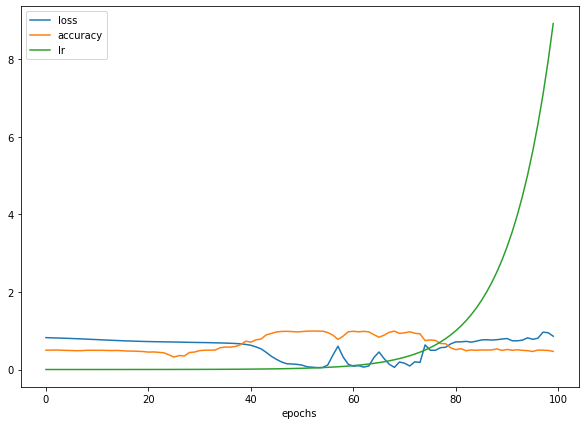

In [81]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

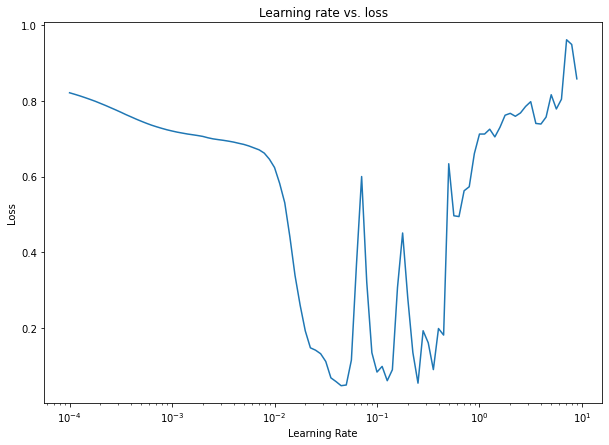

In [82]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [83]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)
     

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.5075
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5075
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5150
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5150
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5150
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5213
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5238
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5387
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5387
Epoch 11/20
25/25 [

In [84]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.4500


[0.6924132704734802, 0.44999998807907104]

313/313 [==============================] - 0s 737us/step
Doing binary classification...
313/313 [==============================] - 0s 812us/step
Doing binary classification...


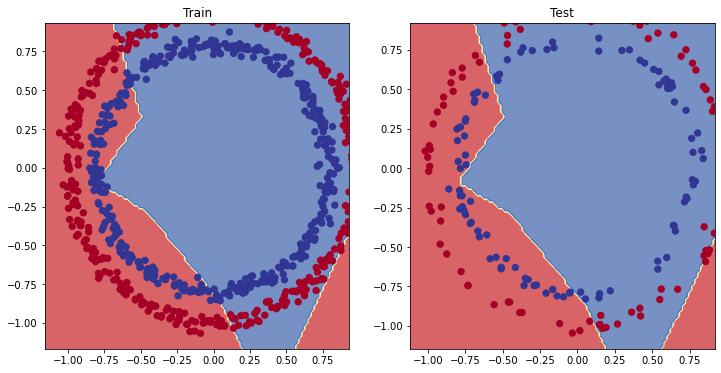

In [85]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [86]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4500
Model loss on test set: 0.6924132704734802
Model accuracy on test set: 45.00%


In [87]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [88]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[38, 63],
       [47, 52]], dtype=int64)